<a href="https://colab.research.google.com/github/listakurniawati/Mathematical-Modelling-for-Chronic-Kidney-Disease-Detection-using-Multi-layer-Perceptron/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import Dataset
dataset = pd.read_excel(r'https://drive.google.com/uc?export=download&id=1zV3EZRWWePzi8w6ZLW10RH62snhM5dQH')
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Menghitung jumlah missing value di setiap kolom
print(dataset)
print(dataset.isnull().sum())
print(dataset.isnull().sum().sum())

      id   age    bp     sg   al   su  ...   dm cad appet   pe  ane  classification
0      0  48.0  80.0  1.020  1.0  0.0  ...  yes  no  good   no   no             ckd
1      1   7.0  50.0  1.020  4.0  0.0  ...   no  no  good   no   no             ckd
2      2  62.0  80.0  1.010  2.0  3.0  ...  yes  no  poor   no  yes             ckd
3      3  48.0  70.0  1.005  4.0  0.0  ...   no  no  poor  yes  yes             ckd
4      4  51.0  80.0  1.010  2.0  0.0  ...   no  no  good   no   no             ckd
..   ...   ...   ...    ...  ...  ...  ...  ...  ..   ...  ...  ...             ...
395  395  55.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
396  396  42.0  70.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
397  397  12.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
398  398  17.0  60.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
399  399  58.0  80.0  1.025  0.0  0.0  ...   no  no  good   no   no         

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64
0    60.0
dtype: float64


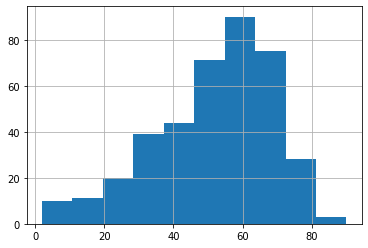

In [ ]:
#Melihat umur keseluruhan pada data
print(dataset['age'].describe())
print(dataset['age'].mode())
dataset['age'].hist()

count    348.000000
mean      12.526437
std        2.912587
min        3.100000
25%       10.300000
50%       12.650000
75%       15.000000
max       17.800000
Name: hemo, dtype: float64


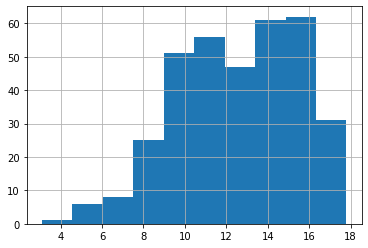

In [ ]:
# Melihat data keseluruhan hemoglobin
print(dataset['hemo'].describe())
dataset['hemo'].hist()

      id   age     bp     sg   al   su  ...   dm  cad appet   pe  ane  classification
2      2  62.0   80.0  1.010  2.0  3.0  ...  yes   no  poor   no  yes             ckd
3      3  48.0   70.0  1.005  4.0  0.0  ...   no   no  poor  yes  yes             ckd
8      8  52.0  100.0  1.015  3.0  0.0  ...  yes   no  good   no  yes             ckd
9      9  53.0   90.0  1.020  2.0  0.0  ...  yes   no  poor   no  yes             ckd
10    10  50.0   60.0  1.010  2.0  4.0  ...  yes   no  good   no  yes             ckd
15    15  40.0   80.0  1.015  3.0  0.0  ...   no   no  good   no  yes             ckd
20    20  61.0   80.0  1.015  2.0  0.0  ...  yes  yes  poor  yes  yes             ckd
22    22  48.0   80.0  1.025  4.0  0.0  ...   no   no  good   no  yes             ckd
23    23  21.0   70.0  1.010  0.0  0.0  ...   no   no  poor   no  yes             ckd
25    25  61.0   60.0  1.025  0.0  0.0  ...  yes   no  good   no  yes             ckd
35    35  65.0   90.0  1.020  2.0  1.0  ...  yes   no 

id                 0
age                3
bp                 2
sg                15
al                15
su                15
rbc               29
pc                15
pcc                0
ba                 0
bgr               12
bu                 2
sc                 2
sod               14
pot               14
hemo               5
pcv               10
wc                18
rc                24
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

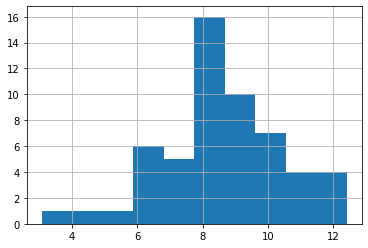

In [ ]:
#Hubungan anemia dengan hemoglobin (dicek dari data anemia)
data_ane1 = dataset[dataset['ane']=='yes']        #data pengidap anemia
data_ane_hemo1 = data_ane1[['hemo','ane']]        #data pengidap anemia dan hemoglobinnya
data_ane1['hemo'].hist()                          #histogram pengidap anemia
print(data_ane1)
print(data_ane1['hemo'].describe())               #statistik hemoglobin pengidap anemia
print(data_ane_hemo1[data_ane_hemo1['hemo']>12])  #data pengidap anemia namun hemoglobin > 12
data_ane1.isnull().sum()

     hemo ane
0    15.4  no
1    11.3  no
4    11.6  no
5    12.2  no
6    12.4  no
..    ...  ..
395  15.7  no
396  16.5  no
397  15.8  no
398  14.2  no
399  15.8  no

[339 rows x 2 columns]
      id   age     bp     sg   al   su  ...   dm  cad appet   pe  ane  classification
1      1   7.0   50.0  1.020  4.0  0.0  ...   no   no  good   no   no             ckd
4      4  51.0   80.0  1.010  2.0  0.0  ...   no   no  good   no   no             ckd
11    11  63.0   70.0  1.010  3.0  0.0  ...  yes   no  poor  yes   no             ckd
12    12  68.0   70.0  1.015  3.0  1.0  ...  yes  yes  poor  yes   no             ckd
13    13  68.0   70.0    NaN  NaN  NaN  ...  yes  yes  poor  yes   no             ckd
..   ...   ...    ...    ...  ...  ...  ...  ...  ...   ...  ...  ...             ...
236  236  65.0   80.0    NaN  NaN  NaN  ...  yes  yes  good  yes   no             ckd
239  239  34.0   90.0  1.015  2.0  0.0  ...   no   no  good   no   no             ckd
240  240  65.0   70.0  1.015  1.0 

id                  0
age                 6
bp                 10
sg                 32
al                 31
su                 34
rbc               123
pc                 50
pcc                 4
ba                  4
bgr                32
bu                 17
sc                 15
sod                73
pot                74
hemo               47
pcv                61
wc                 88
rc                107
htn                 2
dm                  2
cad                 2
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

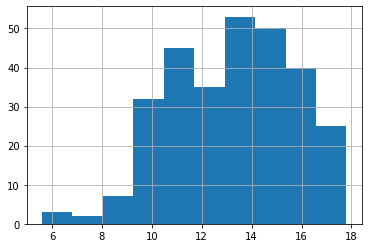

In [ ]:
#Hubungan anemia dengan hemoglobin (dicek dari data tidak anemia)
data_ane2 = dataset[dataset['ane']=='no']   #data yang tidak anemia
data_ane_hemo2 = data_ane2[['hemo','ane']]  #data hemoglobin yang tidak anemia
print(data_ane_hemo2)       
data_ane3 = data_ane2[data_ane2['hemo']<12]     #data yang tidak anemia tetapi hemoglobin < 1
print(data_ane3)
print(data_ane2['hemo'].describe())       #statistik hemoglobin yang tidak anemia
data_ane2['hemo'].hist()      #histogram hemoglobin yang tidak anemia
print(data_ane3[['hemo','age','rbc','ane']])
data_ane2.isnull().sum()

In [ ]:
#Memasukan missing data age dan hemo berdasarkan MEAN
dataset['age'] = dataset['age'].replace(np.nan,51)
dataset['hemo']= dataset['hemo'].replace(np.nan, 12.5)

In [ ]:
#Melihat hubungan Hemoglobin dan PCV (untuk regresi)
dataset_cc = dataset.dropna(axis = 0)
dataset_hemo_pcv = dataset[['hemo','pcv']]
corr1 = dataset_hemo_pcv.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,hemo,pcv
hemo,1.00,0.89
pcv,0.89,1.00


In [ ]:
dataset_hemo_pcv = dataset.dropna(axis = 0, subset = ['hemo','pcv'])
dataset_hemo_pcv = dataset_hemo_pcv.loc[:,['hemo','pcv']]
missing_pcv = dataset['pcv'].isnull()
hemo_mispcv = pd.DataFrame(dataset['hemo'][missing_pcv])

In [ ]:
x1 = dataset_hemo_pcv[['hemo']]
y1 = dataset_hemo_pcv[['pcv']]
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.2, random_state =101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(x1_train, y1_train)
pcv_pred = lm.predict(hemo_mispcv)

In [ ]:
# Memasukan missing data pcv berdasarkan Regresi dengan Hemo
dataset.loc[dataset['pcv'].isnull(),'pcv'] = pcv_pred

In [ ]:
# Melihat hubungan Hemoglobin dan Red Blood Cell Cost (untuk regresi)
dataset_cc = dataset.dropna(axis = 0)
dataset_hemo_rc = dataset[['hemo','rc']]
corr = dataset_hemo_rc.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,hemo,rc
hemo,1.00,0.79
rc,0.79,1.00


In [ ]:
dataset_hemo_rc1 = dataset.dropna(axis = 0, subset = ['hemo','rc'])
dataset_hemo_rc1 = dataset_hemo_rc1.loc[:,['hemo','rc']]
missing_rc= dataset['rc'].isnull()
hemo_misrc = pd.DataFrame(dataset['hemo'][missing_rc])

In [ ]:
x = dataset_hemo_rc1[['hemo']]
y = dataset_hemo_rc1[['rc']]
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(x_train, y_train)
rc_pred = lm.predict(hemo_misrc)

In [ ]:
# Memasukan missing data rc berdasarkan Regresi dengan Hemo
dataset.loc[dataset['rc'].isnull(),'rc'] = rc_pred

In [ ]:
dataset['htn']=dataset['htn'].replace(np.nan,'no')
data_bpno = dataset[dataset['htn']=='no'] 
data_bpyes = dataset[dataset['htn']=='yes'] 
print(data_bpno['bp'].describe())
print(data_bpyes['bp'].describe())
data_bpno['bp'] = data_bpno['bp'].replace(np.nan,70)
data_bpyes['bp'] = data_bpyes['bp'].replace(np.nan,80)
dataset = pd.concat([data_bpno,data_bpyes])
dataset.isnull().sum()

count    243.000000
mean      73.580247
std       10.753663
min       50.000000
25%       70.000000
50%       70.000000
75%       80.000000
max      120.000000
Name: bp, dtype: float64
count    145.000000
mean      81.310345
std       16.467779
min       50.000000
25%       70.000000
50%       80.000000
75%       90.000000
max      180.000000
Name: bp, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


id                  0
age                 0
bp                  0
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo                0
pcv                 0
wc                106
rc                  0
htn                 0
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# Memasukan missing data pcc (notpresent) dan pc (berdasarkan pcc, [notpresent > normal]; [present;abnormal])
dataset['pcc']=dataset['pcc'].replace(np.nan,'notpresent')
data_pcnormal = dataset[dataset['pcc']=='notpresent']
data_pcnormal['pc'] = data_pcnormal['pc'].replace(np.nan,'normal')
data_pcabnormal = dataset[dataset['pcc']=='present']
data_pcabnormal['pc'] = data_pcabnormal['pc'].replace(np.nan, 'abnormal')

dataset = pd.concat([data_pcnormal,data_pcabnormal])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Memasukan missing data dm (no), cad(no),appet(good),pe(no),dan ane(no)
dataset['dm']=dataset['dm'].replace(np.nan,'no')
dataset['cad']=dataset['cad'].replace(np.nan,'no')
dataset['appet']=dataset['appet'].replace(np.nan,'good')
dataset['pe']=dataset['pe'].replace(np.nan,'no')
dataset['ane']=dataset['ane'].replace(np.nan,'no')


In [ ]:
datasu_notckd = dataset[dataset['classification']=='notckd']
datasu_ckd = dataset[dataset['classification']=='ckd']

datasu_notckd['su'] = datasu_notckd['su'].replace(np.nan, 0)

dataset = pd.concat([datasu_notckd,datasu_ckd])

data_su0 = dataset[dataset['su']==0]
data_su1 = dataset[dataset['su']==1]
data_su2 = dataset[dataset['su']==2]
data_su3 = dataset[dataset['su']==3]
data_su4 = dataset[dataset['su']==4]
data_su5 = dataset[dataset['su']==5]
data_su6 = dataset[dataset['su'].isnull()]

print(data_su0['bgr'].mean())
print(data_su1['bgr'].mean())
print(data_su2['bgr'].mean())
print(data_su3['bgr'].mean())
print(data_su4['bgr'].mean())
print(data_su5['bgr'].mean())
print(datasu_ckd['bgr'].mean())

data_su0['bgr']=data_su0['bgr'].replace(np.nan,122)
data_su1['bgr']=data_su1['bgr'].replace(np.nan,213)
data_su2['bgr']=data_su2['bgr'].replace(np.nan,256)
data_su3['bgr']=data_su3['bgr'].replace(np.nan,269)
data_su4['bgr']=data_su4['bgr'].replace(np.nan,302)

dataset = pd.concat([data_su0,data_su1,data_su2,data_su3,data_su4,data_su5,data_su6])
dataset['bgr'] = dataset['bgr'].replace(np.nan,172)

121.8135593220339
213.6153846153846
255.83333333333334
269.0
302.38461538461536
394.3333333333333
172.004


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
# Melihat mean dari bu, sc, sod, pot, dan sg
print(dataset['bu'].mean())
print(dataset['sc'].mean())
print(dataset['sod'].mean())
print(dataset['pot'].mean())
print(dataset['sg'].mean())
# # Memasukan missing data bu, sc, sod, pot, sg, ba berdasarkan mean
dataset['bu']=dataset['bu'].replace(np.nan, 57)
dataset['sc']=dataset['sc'].replace(np.nan, 3.1 )
dataset['sod']=dataset['sod'].replace(np.nan,138 )
dataset['pot']=dataset['pot'].replace(np.nan, 4.6)
dataset['sg']=dataset['sg'].replace(np.nan,1.017 )
dataset['ba']=dataset['ba'].replace(np.nan,'notpresent' )

57.4257217847769
3.0724543080939943
137.52875399361022
4.6272435897435935
1.0174079320113267


count      294.000000
mean      8406.122449
std       2944.474190
min       2200.000000
25%       6500.000000
50%       8000.000000
75%       9800.000000
max      26400.000000
Name: wc, dtype: float64


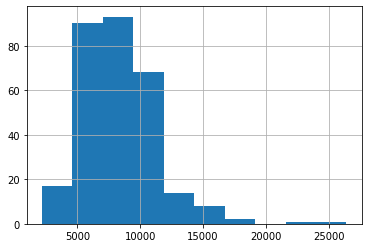

In [ ]:
# Melihat data untuk White Blood Cell (wc)
print(dataset['wc'].describe())
dataset['wc'].hist()
# # Memasukan missing data wc berdasarkan median
dataset['wc'] = dataset['wc'].replace(np.nan, 8)

In [ ]:
dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                 46
su                 44
rbc               152
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [ ]:
# Menghilangkan kolom rbc (Red Blood Cell)
dataset = dataset.drop(['rbc'], axis=1)
# Menghilangkan baris yang masih ada missing value
dataset = dataset.dropna(axis=0)
# Melihat missing value yang ada
dataset.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
# merapihkan beberapa data yang typo dan di cek
dataset['appet']=dataset['appet'].replace('poof','poor')
dataset['appet']=dataset['appet'].replace('goof','good')

print(pd.unique(dataset['appet']))
print(pd.unique(dataset['cad']))
dataset['cad']=dataset['cad'].replace('no ','no')
print(pd.unique(dataset['dm']))
print(pd.unique(dataset['htn']))
print(pd.unique(dataset['pe']))
print(pd.unique(dataset['ane']))
print(pd.unique(dataset['pc']))
print(pd.unique(dataset['pcc']))
print(pd.unique(dataset['ba']))

['good' 'poor']
['no' 'yes' 'no ']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['normal' 'abnormal']
['notpresent' 'present']
['notpresent' 'present']


In [ ]:
# Mengubah data nominal
from sklearn.preprocessing import LabelEncoder
label_1 = LabelEncoder()
dataset['pc'] = label_1.fit_transform(dataset['pc'])
label_2 = LabelEncoder()
dataset['pcc'] = label_2.fit_transform(dataset['pcc'])
label_3 = LabelEncoder()
dataset['ba'] = label_3.fit_transform(dataset['ba'])
label_4 = LabelEncoder()
dataset['htn'] = label_4.fit_transform(dataset['htn'])
label_5 = LabelEncoder()
dataset['dm'] = label_5.fit_transform(dataset['dm'])
label_6 = LabelEncoder()
dataset['cad'] = label_6.fit_transform(dataset['cad'])
label_8 = LabelEncoder()
dataset['pe'] = label_8.fit_transform(dataset['pe'])
label_9 = LabelEncoder()
dataset['ane'] = label_9.fit_transform(dataset['ane'])
label_10 = LabelEncoder()
dataset['appet'] = label_9.fit_transform(dataset['appet'])

dataset['classification']=dataset['classification'].replace('ckd',1)
dataset['classification']=dataset['classification'].replace('notckd',0)

In [ ]:
dataset.sort_values(by=['id'],inplace=True)
dataset.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,138.0,4.6,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,0,0,122.0,18.0,0.8,138.0,4.6,11.3,38.0,6000.0,4.187400,0,0,0,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,138.0,4.6,9.6,31.0,7500.0,3.702609,0,1,0,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,138.0,4.6,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,1


In [ ]:
print(dataset.isnull().sum())

id                0
age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [ ]:
print(dataset)

      id   age    bp     sg   al   su  ...  dm  cad  appet  pe  ane  classification
0      0  48.0  80.0  1.020  1.0  0.0  ...   1    0      0   0    0               1
1      1   7.0  50.0  1.020  4.0  0.0  ...   0    0      0   0    0               1
2      2  62.0  80.0  1.010  2.0  3.0  ...   1    0      1   0    1               1
3      3  48.0  70.0  1.005  4.0  0.0  ...   0    0      1   1    1               1
4      4  51.0  80.0  1.010  2.0  0.0  ...   0    0      0   0    0               1
..   ...   ...   ...    ...  ...  ...  ...  ..  ...    ...  ..  ...             ...
395  395  55.0  80.0  1.020  0.0  0.0  ...   0    0      0   0    0               0
396  396  42.0  70.0  1.025  0.0  0.0  ...   0    0      0   0    0               0
397  397  12.0  80.0  1.020  0.0  0.0  ...   0    0      0   0    0               0
398  398  17.0  60.0  1.025  0.0  0.0  ...   0    0      0   0    0               0
399  399  58.0  80.0  1.025  0.0  0.0  ...   0    0      0   0    0         

In [ ]:
#Export Dataset
from google.colab import files
dataset.to_csv('DatasetPGK(Processed).csv') 
files.download('DatasetPGK(Processed).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>